## Data Stories

Let's have some fun poking around the data.  

First I want to look at utilities.  See 'data_story_utilities'

### Contents:
1. imports
2. ecdf, etc
3. load datafile
4. check index for nulls; ok
5. peek dfFull
6. ensure sorted index
7. info
8. assign columns dict
9. view it
10. check which cols mixed type
11. assign bySize to data sorted by size
12. look at largest 24
13. \# comment
14. assign utils 
15. describe utils
16. save utils csv file
17. assign dfRes install_type 'residential'
18. assign dfCom install_type 'commercial'
19. describe cost_per_watt, size_kw, cost
20. def mid98 - return middle 98% of data
21. desc mid98(dfRes.cost_per_watt)
22. desc dfRes.cost_per_watt
23. check 1st and 99th %-tile
24. plot dist dfRes.cpw
25. plot dist mid98(dfRes.cpw)
26. plot cdf dfRes.cpw
27. plot cdf mid98(dfRes.cpw)
28. plot dfRes.cost
29. plot mid98(dfRes.cost)
30. plot dist dfRes.cost
31. plot dist mid98(dfRes.cost)

### List of numeric fields to consider dropping.

| variable                   | description        |
|:---------------------------|:--------------------
|lbnl_tts_version_year       | internal to lbnl; not useful
|annual_PV_prod	             | not helpful
|annual_insolation	         | not helpful
|sales_tax_cost	             | not helpful
|tilt1	                     | not helpful
|azimuth1	                 | not helpful
|reported_annual_energy_prod | not helpful	
|pbi_length	                 | not helpful

|pbi_length	


### Start by loading up

In [1]:
# set up
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y

def min015099max(series):
    vals = list(np.percentile(series, [1.0, 50.0, 99.0]))
    vals.insert(-1, series.max())
    vals.insert(0, series.min())
    return vals

# ss = np.arange(1, 101)
# min_1_50_99_max(ss)                

In [3]:
# this is under 20sec now
dfFull = pd.read_csv('../local/data/live_20171219_1.csv', index_col='date_installed', parse_dates=True)

C:\Users\saus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# check that index contains no null entries
dfFull.index.isnull().sum()

0

In [5]:
dfFull.head()

,state,incentive_prog_names,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,lbnl_tts_version_year,...,reported_annual_energy_prod,year,pbi_length,utility,bipv_3,bipv_2,bipv_1,new_constr,tracking,3rdparty
date_installed,,,,,,,,,,,,,,,,,,,,,
1909-07-07,IN,NaN,4.90,NaN,47401,residential,Stumpner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-07-07,IN,NaN,7.35,NaN,47401,residential,Stumpner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-07-07,IN,NaN,3.90,NaN,47408,residential,Stumpner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-07-07,IN,NaN,9000.00,NaN,46222,commercial,JMS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-12-31,FL,NaN,5.52,NaN,32653,residential,NaN,5.9,32568.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfFull.sort_index(inplace=True)

In [7]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1020516 entries, 1909-07-07 to 2017-11-25
Data columns (total 37 columns):
state                          1020516 non-null object
incentive_prog_names           797958 non-null object
size_kw                        1020516 non-null float64
appraised                      224036 non-null object
zipcode                        1020516 non-null int64
install_type                   977940 non-null object
installer                      702466 non-null object
cost_per_watt                  762941 non-null float64
cost                           763102 non-null float64
lbnl_tts_version_year          797958 non-null float64
lbnl_tts                       797958 non-null object
city                           798954 non-null object
utility_clean                  792717 non-null object
tech_1                         580917 non-null object
model1_clean                   580917 non-null object
county                         998649 non-null object
an

In [8]:
theColumns = dict(enumerate(dfFull.columns))

In [9]:
theColumns

{0: 'state',
 1: 'incentive_prog_names',
 2: 'size_kw',
 3: 'appraised',
 4: 'zipcode',
 5: 'install_type',
 6: 'installer',
 7: 'cost_per_watt',
 8: 'cost',
 9: 'lbnl_tts_version_year',
 10: 'lbnl_tts',
 11: 'city',
 12: 'utility_clean',
 13: 'tech_1',
 14: 'model1_clean',
 15: 'county',
 16: 'annual_PV_prod',
 17: 'annual_insolation',
 18: 'rebate',
 19: 'sales_tax_cost',
 20: 'tilt1',
 21: 'tracking_type',
 22: 'azimuth1',
 23: 'manuf2_clean',
 24: 'manuf3_clean',
 25: 'manuf1_clean',
 26: 'inv_man_clean',
 27: 'reported_annual_energy_prod',
 28: 'year',
 29: 'pbi_length',
 30: 'utility',
 31: 'bipv_3',
 32: 'bipv_2',
 33: 'bipv_1',
 34: 'new_constr',
 35: 'tracking',
 36: '3rdparty'}

In [10]:
# which columns have mixed type at this point
[theColumns[col] for col in (19,29,31)]

['sales_tax_cost', 'pbi_length', 'bipv_3']

#### Story - look at largest 2 dozen 

In [11]:
# I wonder if this copies the data or just gives you an array of pointers to it?
bySize = dfFull.sort_values(['size_kw'])

In [12]:
# okay everyone is a utility except for 2 bad data from Roseville CA.
# and every is null everywhere except for size.  Wait there's 1 priced entry in TX
# $89M @ 3.84/watt in 2012
bySize.tail(24)

,state,incentive_prog_names,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,lbnl_tts_version_year,...,reported_annual_energy_prod,year,pbi_length,utility,bipv_3,bipv_2,bipv_1,new_constr,tracking,3rdparty
date_installed,,,,,,,,,,,,,,,,,,,,,
2012-06-25,CA,NaN,20000.0,NaN,93721,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-01,NJ,NaN,20000.0,NaN,8098,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-01,CA,NaN,21000.0,NaN,92225,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-11,CA,NaN,22000.0,NaN,93204,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-04,CA,NaN,23000.0,NaN,92257,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-11,CA,NaN,23000.0,NaN,93204,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-18,TX,NaN,23132.0,NaN,78221,utility,NaN,3.84,88733345.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-01,NV,NaN,24000.0,NaN,89406,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-29,CA,NaN,25000.0,NaN,93627,utility,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# let's look at all the 'utility's

In [14]:
### Okay, light bulb goes on.  Since this is a nice little set of data we can save it out
### on its own and science the shit out of it.  Also has the characteristic that many fields
### are null and can be dropped.  

utils = dfFull[dfFull.install_type == 'utility']

In [15]:
# df.describe's default behavior is to show stats for numeric fields.  That's nice in this case 
# because it's expose some of the fields as particularly useless.
# Let's begin to list candidates for dropping to reduce cognitive load.
utils.describe()

,size_kw,zipcode,cost_per_watt,cost,lbnl_tts_version_year,annual_PV_prod,annual_insolation,sales_tax_cost,tilt1,azimuth1,reported_annual_energy_prod,pbi_length,bipv_3,bipv_2,bipv_1,new_constr,tracking,3rdparty
count,230.000000,230.000000,66.000000,6.600000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7813.015487,52276.147826,6.744091,1.564180e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,23593.192729,33723.885321,3.140749,2.888603e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.900000,1007.000000,2.430000,1.150000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,517.693750,19947.750000,4.040000,6.879875e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2164.600000,47485.000000,6.075000,3.979253e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8165.000000,87089.500000,9.002500,1.184034e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,333000.000000,99353.000000,14.940000,1.522000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
utils.to_csv('../local/data/utilities.csv')

### Pull out residential and commercial data into their own dataframes

In [17]:
dfRes = dfFull[dfFull.install_type == 'residential']

In [18]:
dfCom = dfFull[dfFull.install_type == 'commercial']

###  size and cost in residential installations

Cost_per_watt is the most important variable because it is the value we'll be modeling. It is not completely populated (763k/1.02M).

Investigate relationship between cost_per_watt, cost and size_kw.  One might assume that 

  $$ costPerWatt ~= cost/size(kw  * 0.001 $$

First we look at the distribution of $cost\_per\_watt$, $size\_kw$ and $cost$.

It's evident that there are outliers in each variable.  After discarding the top and bottom 1%, the distributions look relatively well-behaved.  

In [19]:
dfRes[['cost_per_watt', 'size_kw', 'cost']].describe()

,cost_per_watt,size_kw,cost
count,674728.000000,907982.000000,6.747460e+05
mean,5.799613,7.276421,3.375231e+04
std,1.993290,839.134757,3.153980e+04
min,0.000000,0.005600,0.000000e+00
25%,4.535147,3.709381,2.065000e+04
50%,5.410000,5.376000,2.937600e+04
75%,6.950000,7.500000,4.108200e+04
max,29.825243,737319.000000,3.940000e+06


###### cost_per_watt

The distribution looks fairly reasonable for the data we have.   Median \$5.41/watt.  Mean is \$5.80.


In [20]:
# utility for hiding top and bottom 1% for plotting
def mid98(series):
    '''
    return middle 98% of series
    '''
    bounds = series.quantile([0.01, 0.99])
    return(series[(series > bounds.values[0]) & (series < bounds.values[1])])

In [21]:
mid98(dfRes.cost_per_watt).describe()

count    661225.000000
mean          5.755547
std           1.738462
min           1.964879
25%           4.569204
50%           5.410000
75%           6.900000
max          12.088889
Name: cost_per_watt, dtype: float64

In [22]:
dfRes.cost_per_watt.describe()

count    674728.000000
mean          5.799613
std           1.993290
min           0.000000
25%           4.535147
50%           5.410000
75%           6.950000
max          29.825243
Name: cost_per_watt, dtype: float64

In [23]:
dfRes.cost_per_watt.quantile([0.01, 0.99])

0.01     1.964860
0.99    12.089286
Name: cost_per_watt, dtype: float64

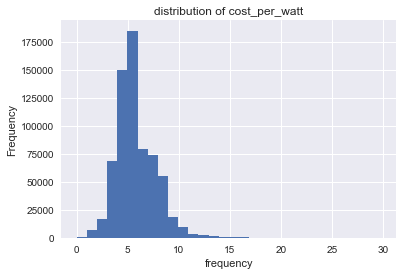

In [24]:
## some bad data at the high and low ends.
dfRes.cost_per_watt.plot(kind='hist', bins=30)
plt.xlabel('cost per watt')
plt.xlabel('frequency')
plt.title('distribution of cost_per_watt');

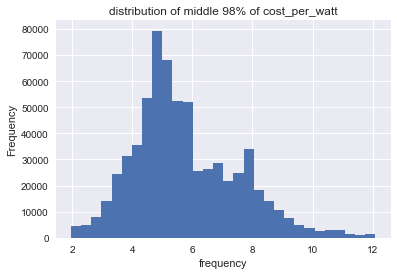

In [25]:
mid98(dfRes.cost_per_watt).plot(kind='hist', bins=30)
plt.xlabel('cost per watt')
plt.xlabel('frequency')
plt.title('distribution of middle 98% of cost_per_watt');

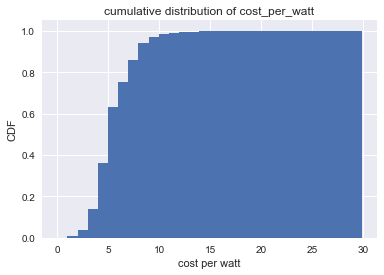

In [26]:
dfRes.cost_per_watt.plot(kind='hist', bins=30, cumulative=True, normed=True)
plt.xlabel('cost per watt')
plt.ylabel('CDF')
plt.title('cumulative distribution of cost_per_watt');

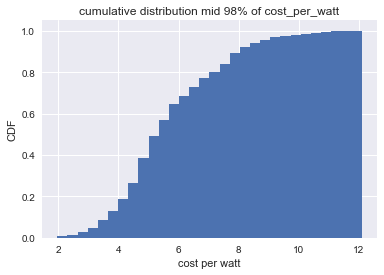

In [27]:
mid98(dfRes.cost_per_watt).plot(kind='hist', bins=30, cumulative=True, normed=True)
plt.xlabel('cost per watt')
plt.ylabel('CDF')
plt.title('cumulative distribution mid 98% of cost_per_watt');

###### cost
Presumably this is the total cost of the installation.

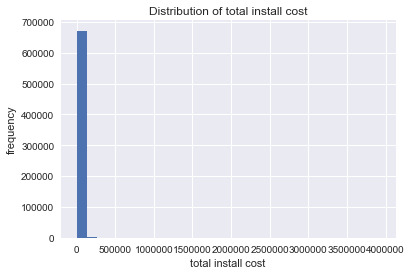

In [28]:
# something funny here.  Summary stats say median is $30k.  Mean is double that.
dfRes.cost.plot(kind='hist', bins=30)
plt.xlabel('total install cost ')
plt.ylabel('frequency')
plt.title('Distribution of total install cost');

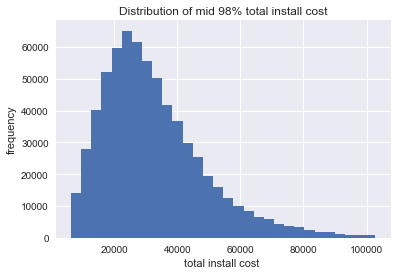

In [29]:
# without the bottom and top 1%
mid98(dfRes.cost).plot(kind='hist', bins=30)
plt.xlabel('total install cost ')
plt.ylabel('frequency')
plt.title('Distribution of mid 98% total install cost');

##### size
Total kilowatts for installation.

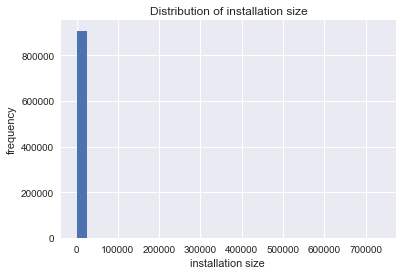

In [30]:
# looks a lot like the cost distribution
dfRes.size_kw.plot(kind='hist', bins=30)
plt.xlabel('installation size ')
plt.ylabel('frequency')
plt.title('Distribution of installation size');

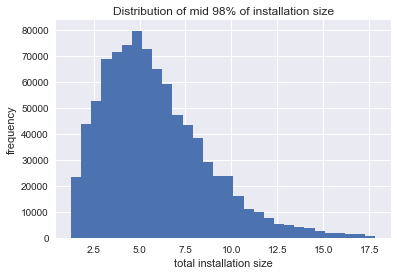

In [31]:
# much more like data
mid98(dfRes.size_kw).plot(kind='hist', bins=30)
plt.xlabel('total installation size')
plt.ylabel('frequency')
plt.title('Distribution of mid 98% of installation size');

---

### Breaking here...

### look at the relationship between cost-per-watt, cost and size(kw)

In [32]:
def after(df=dfFull, year=2004):
    return dfFull.loc[dfFull.index > pd.to_datetime(year)]
    

In [33]:
# (size_kw * cost_per_watt) * 1000 ~= cost
thing =  (after().size_kw * after().cost_per_watt * 1000)/after().cost